<a href="https://colab.research.google.com/github/CyberBantu/Analise_1746_Dados_Marginais/blob/main/Analise_1746.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install basedosdados

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.2/135.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import basedosdados as bd

In [3]:
!pip install -U google-cloud-aiplatform "shapely<2"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.8/276.8 kB 27.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1


In [4]:
# Para carregar o dado direto no pandas
df = bd.read_sql ( "SELECT * FROM `datario.administracao_servicos_publicos.chamado_1746` where EXTRACT(YEAR FROM data_inicio) = 2022" , billing_project_id = "analise-1746" )

Downloading: 100%|██████████| 773524/773524 [04:06<00:00, 3142.84rows/s]


In [5]:
# Olhando para o tamanho do DF
df.head()



id_chamado         data_inicio            data_fim id_bairro  \
0   17869191 2022-11-03 10:43:28 2022-11-11 10:29:03       144   
1   17949670 2022-11-25 09:47:16 2022-11-25 13:18:40       144   
2   17890839 2022-11-09 11:40:51 2022-11-09 14:13:29         5   
3   17878720 2022-11-06 12:29:00 2022-11-07 09:03:22        52   
4   17898500 2022-11-10 20:33:21 2022-11-11 14:47:18        75   

  id_territorialidade id_logradouro  numero_logradouro  \
0                   5        260851                  6   
1                   5         35279                  0   
2                   1         62984                  0   
3                   3         63933               2725   
4                   3         10645               1525   

  id_unidade_organizacional          nome_unidade_organizacional  \
0                       186                                21aGC   
1                       597                           Patrimônio   
2                       597                           Patrimônio   
3                       597                           Patrimônio   
4                        71  SMS - Secretaria Municipal de Saúde   

                       id_unidade_organizacional_mae  ... tempo_prazo  \
0                                         SECONSERVA  ...        <NA>   
1  SMFP - Secretaria Municipal de Fazenda e Plane...  ...        <NA>   
2  SMFP - Secretaria Municipal de Fazenda e Plane...  ...        <NA>   
3  SMFP - Secretaria Municipal de Fazenda e Plane...  ...        <NA>   
4                SMS - Secretaria Municipal de Saúde  ...        <NA>   

  prazo_unidade prazo_tipo dentro_prazo   situacao tipo_situacao  \
0             D          F     No prazo  Encerrado  Não atendido   
1             D          F     No prazo  Encerrado  Não atendido   
2             D          F     No prazo  Encerrado  Não atendido   
3             D          F     No prazo  Encerrado  Não atendido   
4             D          F     No prazo  Encerrado  Não atendido   

  justificativa_status  reclamacoes  data_particao  \
0                 None            0     2022-11-01   
1                 None            0     2022-11-01   
2                 None            0     2022-11-01   
3                 None            0     2022-11-01   
4                 None            0     2022-11-01   

                         geometry  
0                            None  
1   POINT(-43.5360839 -22.878013)  
2  POINT(-43.1805742 -22.9034836)  
3  POINT(-43.2847833 -22.8875014)  
4  POINT(-43.3181857 -22.8271367)  

[5 rows x 32 columns]

In [6]:
df.columns

Index(['id_chamado', 'data_inicio', 'data_fim', 'id_bairro',
       'id_territorialidade', 'id_logradouro', 'numero_logradouro',
       'id_unidade_organizacional', 'nome_unidade_organizacional',
       'id_unidade_organizacional_mae', 'unidade_organizacional_ouvidoria',
       'categoria', 'id_tipo', 'tipo', 'id_subtipo', 'subtipo', 'status',
       'longitude', 'latitude', 'data_alvo_finalizacao',
       'data_alvo_diagnostico', 'data_real_diagnostico', 'tempo_prazo',
       'prazo_unidade', 'prazo_tipo', 'dentro_prazo', 'situacao',
       'tipo_situacao', 'justificativa_status', 'reclamacoes', 'data_particao',
       'geometry'],
      dtype='object')

In [7]:
pd.set_option('display.max_columns', None)  # exibe todas as colunas
pd.set_option('display.width', None)  # permite que as colunas sejam exibidas sem quebrar a linha
pd.set_option('display.max_colwidth', None)
df.head()

id_chamado         data_inicio            data_fim id_bairro  \
0   17869191 2022-11-03 10:43:28 2022-11-11 10:29:03       144   
1   17949670 2022-11-25 09:47:16 2022-11-25 13:18:40       144   
2   17890839 2022-11-09 11:40:51 2022-11-09 14:13:29         5   
3   17878720 2022-11-06 12:29:00 2022-11-07 09:03:22        52   
4   17898500 2022-11-10 20:33:21 2022-11-11 14:47:18        75   

  id_territorialidade id_logradouro  numero_logradouro  \
0                   5        260851                  6   
1                   5         35279                  0   
2                   1         62984                  0   
3                   3         63933               2725   
4                   3         10645               1525   

  id_unidade_organizacional          nome_unidade_organizacional  \
0                       186                                21aGC   
1                       597                           Patrimônio   
2                       597                           Patrimônio   
3                       597                           Patrimônio   
4                        71  SMS - Secretaria Municipal de Saúde   

                           id_unidade_organizacional_mae  \
0                                             SECONSERVA   
1  SMFP - Secretaria Municipal de Fazenda e Planejamento   
2  SMFP - Secretaria Municipal de Fazenda e Planejamento   
3  SMFP - Secretaria Municipal de Fazenda e Planejamento   
4                    SMS - Secretaria Municipal de Saúde   

  unidade_organizacional_ouvidoria categoria id_tipo                   tipo  \
0                            False   Serviço       9  Drenagem e Saneamento   
1                            False   Serviço      10      Mobiliário Urbano   
2                            False   Serviço      10      Mobiliário Urbano   
3                            False   Serviço      10      Mobiliário Urbano   
4                            False   Serviço      80                 Dengue   

  id_subtipo                                                         subtipo  \
0        102             Desobstrução de galerias e ramais de águas pluviais   
1        130                                  Instalação de abrigo de ônibus   
2        144   Instalação/ Remoção/ Manutenção de placa de rua tipo pirulito   
3        144   Instalação/ Remoção/ Manutenção de placa de rua tipo pirulito   
4        999  Vistoria em foco de Aedes Aegypti (Dengue, Chikungunya e Zika)   

      status  longitude   latitude data_alvo_finalizacao  \
0  Cancelado        NaN        NaN   2022-11-28 10:19:00   
1  Cancelado -43.536084 -22.878013   2022-12-16 09:47:00   
2  Cancelado -43.180574 -22.903484   2022-12-01 11:40:00   
3  Cancelado -43.284783 -22.887501   2022-11-29 00:00:00   
4  Cancelado -43.318186 -22.827137   2022-11-18 20:33:00   

  data_alvo_diagnostico data_real_diagnostico  tempo_prazo prazo_unidade  \
0                   NaT                   NaT         <NA>             D   
1                   NaT                   NaT         <NA>             D   
2                   NaT                   NaT         <NA>             D   
3                   NaT                   NaT         <NA>             D   
4                   NaT                   NaT         <NA>             D   

  prazo_tipo dentro_prazo   situacao tipo_situacao justificativa_status  \
0          F     No prazo  Encerrado  Não atendido                 None   
1          F     No prazo  Encerrado  Não atendido                 None   
2          F     No prazo  Encerrado  Não atendido                 None   
3          F     No prazo  Encerrado  Não atendido                 None   
4          F     No prazo  Encerrado  Não atendido                 None   

   reclamacoes data_particao                        geometry  
0            0    2022-11-01                            None  
1            0    2022-11-01   POINT(-43.5360839 -22.878013)  
2            0    2022-11-01  POINT(-43.1805742 -22.9034836)  
3        

In [8]:
max(df['data_inicio'])

Timestamp('2022-12-31 23:57:22')

In [9]:
# quais categorias temos
df['status'].unique()

array(['Cancelado', 'Pendente', 'Aberto', 'Em Andamento',
       'Não constatado', 'Fechado com solução', 'Fechado com informação',
       'Fechado com providências', 'Sem possibilidade de atendimento',
       'Fechado de Ofício'], dtype=object)

In [10]:
ids = df['id_chamado'].unique()
len(ids)

773524

Sabendo sobre os status dos chamados

In [11]:
df.groupby(['status'])['id_chamado'].count().reset_index().sort_values(by = 'id_chamado', ascending = False)

status  id_chamado
5               Fechado com solução      481953
9  Sem possibilidade de atendimento      107472
7                    Não constatado       76900
4          Fechado com providências       40942
0                            Aberto       28771
2                      Em Andamento       26732
3            Fechado com informação        8194
1                         Cancelado        2353
6                 Fechado de Ofício         152
8                          Pendente          55

###### Tipo de Ocorrências

In [12]:
df.groupby(['tipo'])['categoria'].count().reset_index().sort_values(by = 'categoria', ascending = False).head(6)

tipo  categoria
42        Iluminação Pública     120482
30  Estacionamento Irregular     110106
73          Remoção Gratuita      98978
46                   Limpeza      56561
58              Pavimentação      53249
48            Manejo Arbóreo      33830

* Qual foram os Bairros com maior Numero de Chamados

#### Tempo médio de fechado com solução

In [13]:
temp = df[df['status'].isin(['Fechado com solução', 'Fechado de Ofício', 'Fechado com informação'])]

In [14]:
temp

id_chamado         data_inicio            data_fim id_bairro  \
12065    17867504 2022-11-02 15:23:02 2022-11-05 10:59:00         2   
12066    17875882 2022-11-04 20:06:13 2022-11-05 09:13:00         3   
12067    17966100 2022-11-30 07:23:50 2022-11-30 14:17:00         3   
12068    17916794 2022-11-16 21:05:39 2022-11-17 22:44:00         3   
12069    17931373 2022-11-21 10:21:37 2022-11-21 23:33:00         3   
...           ...                 ...                 ...       ...   
773499   17035358 2022-03-19 12:15:05 2022-04-19 17:31:22      None   
773500   17019635 2022-03-15 18:05:28 2022-04-29 17:55:12      None   
773501   17013196 2022-03-14 14:46:47 2022-04-29 17:56:52      None   
773503   17015180 2022-03-14 21:51:22 2022-04-25 12:04:13      None   
773504   17042007 2022-03-21 16:29:24 2022-04-13 16:27:52      None   

       id_territorialidade id_logradouro  numero_logradouro  \
12065                    1         80424                  8   
12066                    1         60616                  0   
12067                    1         63305                 55   
12068                    1         62059                127   
12069                    1         61531                  0   
...                    ...           ...                ...   
773499                None          None               <NA>   
773500                None          None               <NA>   
773501                None          None               <NA>   
773503                None          None               <NA>   
773504                None          None               <NA>   

       id_unidade_organizacional  \
12065                          8   
12066                          8   
12067                          8   
12068                          8   
12069                          8   
...                          ...   
773499                      1283   
773500                      1283   
773501                      1283   
773503                      1283   
773504                      1283   

                                 nome_unidade_organizacional  \
12065   RIOLUZ - Companhia Municipal de Energia e Iluminação   
12066   RIOLUZ - Companhia Municipal de Energia e Iluminação   
12067   RIOLUZ - Companhia Municipal de Energia e Iluminação   
12068   RIOLUZ - Companhia Municipal de Energia e Iluminação   
12069   RIOLUZ - Companhia Municipal de Energia e Iluminação   
...                                                      ...   
773499                                          Central 1746   
773500                                          Central 1746   
773501                                          Central 1746   
773503                                          Central 1746   
773504                                          Central 1746   

                                         id_unidade_organizacional_mae  \
12065             RIOLUZ - Companhia Municipal de Energia e Iluminação   
12066             RIOLUZ - Companhia Municipal de Energia e Iluminação   
12067             RIOLUZ - Companhia Municipal de Energia e Iluminação   
12068             RIOLUZ - Companhia Municipal de Energia e Iluminação   
12069             RIOLUZ - Companhia Municipal de Energia e Iluminação   
...                                                                ...   
773499  SEGOVI - Secretaria Municipal de Governo e Integridade Publica   
773500  SEGOVI - Secretaria Municipal de Governo e Integridade Publica   
773501  SEGOVI - Secretaria Municipal de Governo e Integridade Publica   
773503  SEGOVI - Secretaria Municipal de Governo e Integridade Publica   
773504  SEGOVI - Secretaria Municipal de Governo e Integridade Publica   

       unidade_organizacional_ouvidoria categoria id_tipo  \
12065                             False   Serviço       1   
12066                             False   Serviço       1   
12067                             False   Serviço       1   
12068                             False   Serviço       1   
1

In [15]:
temp['tempo_solicitação'] = temp['data_fim'] - temp['data_inicio']

In [16]:
prazo = temp.groupby(['dentro_prazo'])['id_chamado'].count().reset_index()

In [17]:
prazo

dentro_prazo  id_chamado
0  Fora do prazo      111672
1       No prazo      378627

In [18]:
prazo['porcentagem'] = round(prazo['id_chamado'] / prazo['id_chamado'].sum()*100,2)

In [19]:
prazo

dentro_prazo  id_chamado  porcentagem
0  Fora do prazo      111672        22.78
1       No prazo      378627        77.22

In [20]:
# analisando onde tem mais fora do prazo
fora =  temp[temp['dentro_prazo'] == 'Fora do prazo']

In [21]:
fora

id_chamado         data_inicio            data_fim id_bairro  \
12095    17902493 2022-11-11 18:35:33 2022-11-15 22:40:00         5   
12097    17877790 2022-11-05 19:10:21 2022-11-09 23:39:00         5   
12102    17948802 2022-11-24 21:58:51 2022-11-30 21:48:00         5   
12104    17904169 2022-11-12 13:37:17 2022-11-17 16:02:00         6   
12109    17889073 2022-11-08 23:56:05 2022-11-15 02:14:00         7   
...           ...                 ...                 ...       ...   
773499   17035358 2022-03-19 12:15:05 2022-04-19 17:31:22      None   
773500   17019635 2022-03-15 18:05:28 2022-04-29 17:55:12      None   
773501   17013196 2022-03-14 14:46:47 2022-04-29 17:56:52      None   
773503   17015180 2022-03-14 21:51:22 2022-04-25 12:04:13      None   
773504   17042007 2022-03-21 16:29:24 2022-04-13 16:27:52      None   

       id_territorialidade id_logradouro  numero_logradouro  \
12095                    1         63057                 65   
12097                    1         61168                 46   
12102                    1         62851                159   
12104                    1         74005                854   
12109                    1         80705                155   
...                    ...           ...                ...   
773499                None          None               <NA>   
773500                None          None               <NA>   
773501                None          None               <NA>   
773503                None          None               <NA>   
773504                None          None               <NA>   

       id_unidade_organizacional  \
12095                          8   
12097                          8   
12102                          8   
12104                          8   
12109                          8   
...                          ...   
773499                      1283   
773500                      1283   
773501                      1283   
773503                      1283   
773504                      1283   

                                 nome_unidade_organizacional  \
12095   RIOLUZ - Companhia Municipal de Energia e Iluminação   
12097   RIOLUZ - Companhia Municipal de Energia e Iluminação   
12102   RIOLUZ - Companhia Municipal de Energia e Iluminação   
12104   RIOLUZ - Companhia Municipal de Energia e Iluminação   
12109   RIOLUZ - Companhia Municipal de Energia e Iluminação   
...                                                      ...   
773499                                          Central 1746   
773500                                          Central 1746   
773501                                          Central 1746   
773503                                          Central 1746   
773504                                          Central 1746   

                                         id_unidade_organizacional_mae  \
12095             RIOLUZ - Companhia Municipal de Energia e Iluminação   
12097             RIOLUZ - Companhia Municipal de Energia e Iluminação   
12102             RIOLUZ - Companhia Municipal de Energia e Iluminação   
12104             RIOLUZ - Companhia Municipal de Energia e Iluminação   
12109             RIOLUZ - Companhia Municipal de Energia e Iluminação   
...                                                                ...   
773499  SEGOVI - Secretaria Municipal de Governo e Integridade Publica   
773500  SEGOVI - Secretaria Municipal de Governo e Integridade Publica   
773501  SEGOVI - Secretaria Municipal de Governo e Integridade Publica   
773503  SEGOVI - Secretaria Municipal de Governo e Integridade Publica   
773504  SEGOVI - Secretaria Municipal de Governo e Integridade Publica   

       unidade_organizacional_ouvidoria categoria id_tipo  \
12095                             False   Serviço       1   
12097                             False   Serviço       1   
12102                             False   Serviço       1   
12104                             False   Serviço       1   
1

In [22]:
ocorrenias_bairro = df['id_bairro'].value_counts().reset_index().rename( columns = {'index': 'id_bairro',
                                                        'id_bairro':'ocorrencias'})

In [26]:
# Coletando dados de Bairros diretamente do Data_rio
bairros = bd.read_sql ( "SELECT * FROM `datario.dados_mestres.bairro`" , billing_project_id = "analise-1746" )
bairros

Downloading: 100%|██████████| 164/164 [00:01<00:00, 106.09rows/s]


id_bairro                nome id_area_planejamento id_regiao_planejamento  \
0           2              Gamboa                    1                    1.1   
1           1               Saúde                    1                    1.1   
2           4                Caju                    1                    1.1   
3           3        Santo Cristo                    1                    1.1   
4         161                Lapa                    1                    1.1   
..        ...                 ...                  ...                    ...   
159       150            Sepetiba                    5                    5.3   
160       152  Barra de Guaratiba                    5                    5.4   
161       164   Ilha de Guaratiba                    5                    5.4   
162       151           Guaratiba                    5                    5.4   
163       153  Pedra de Guaratiba                    5                    5.4   

    nome_regiao_planejamento id_regiao_administrativa  \
0                     Centro                        1   
1                     Centro                        1   
2                     Centro                        1   
3                     Centro                        1   
4                     Centro                        2   
..                       ...                      ...   
159               Santa Cruz                       19   
160                Guaratiba                       26   
161                Guaratiba                       26   
162                Guaratiba                       26   
163                Guaratiba                       26   

    nome_regiao_administrativa subprefeitura          area     perimetro  \
0                    Portuaria        Centro  1.112903e+06   4612.833630   
1                    Portuaria        Centro  3.638176e+05   2646.220568   
2                    Portuaria        Centro  5.347481e+06  19800.522524   
3                    Portuaria        Centro  1.684721e+06   6743.227885   
4                       Centro        Centro  2.983258e+05   3849.181818   
..                         ...           ...           ...           ...   
159                 Santa Cruz    Zona Oeste  1.162130e+07  21108.849494   
160                  Guaratiba    Zona Oeste  9.442030e+06  27508.223750   
161                  Guaratiba    Zona Oeste  7.714616e+06  13955.136856   
162                  Guaratiba    Zona Oeste  1.317866e+08  88693.995709   
163                  Guaratiba    Zona Oeste  3.636912e+06   8804.335635   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [24]:
# ocorrencias fora por bairro
ocorrencias_fora = fora.merge(bairros, on='id_bairro')

In [25]:
ocorrencias_fora

id_chamado         data_inicio            data_fim id_bairro  \
0        17902493 2022-11-11 18:35:33 2022-11-15 22:40:00         5   
1        17877790 2022-11-05 19:10:21 2022-11-09 23:39:00         5   
2        17948802 2022-11-24 21:58:51 2022-11-30 21:48:00         5   
3        17906032 2022-11-13 14:53:24 2022-11-16 03:31:00         5   
4        17905006 2022-11-12 20:39:27 2022-11-14 03:46:00         5   
...           ...                 ...                 ...       ...   
106889   16739140 2022-01-05 10:22:15 2022-08-29 19:50:40       163   
106890   17051872 2022-03-23 15:51:47 2022-05-04 21:29:00       163   
106891   16991591 2022-03-08 18:22:57 2022-03-29 10:21:00       163   
106892   16967366 2022-03-02 11:26:28 2022-03-11 02:45:00       163   
106893   17070254 2022-03-28 18:53:11 2022-10-20 17:31:17       163   

       id_territorialidade id_logradouro  numero_logradouro  \
0                        1         63057                 65   
1                        1         61168                 46   
2                        1         62851                159   
3                        1         61630               <NA>   
4                        1         62901               <NA>   
...                    ...           ...                ...   
106889                   5         92932                 46   
106890                   5        101980                378   
106891                   5        101964                238   
106892                   5        101980                319   
106893                   5         92924                  1   

       id_unidade_organizacional  \
0                              8   
1                              8   
2                              8   
3                              8   
4                              8   
...                          ...   
106889                       185   
106890                         8   
106891                         8   
106892                         8   
106893                         8   

                                 nome_unidade_organizacional  \
0       RIOLUZ - Companhia Municipal de Energia e Iluminação   
1       RIOLUZ - Companhia Municipal de Energia e Iluminação   
2       RIOLUZ - Companhia Municipal de Energia e Iluminação   
3       RIOLUZ - Companhia Municipal de Energia e Iluminação   
4       RIOLUZ - Companhia Municipal de Energia e Iluminação   
...                                                      ...   
106889                                                 20aGC   
106890  RIOLUZ - Companhia Municipal de Energia e Iluminação   
106891  RIOLUZ - Companhia Municipal de Energia e Iluminação   
106892  RIOLUZ - Companhia Municipal de Energia e Iluminação   
106893  RIOLUZ - Companhia Municipal de Energia e Iluminação   

                               id_unidade_organizacional_mae  \
0       RIOLUZ - Companhia Municipal de Energia e Iluminação   
1       RIOLUZ - Companhia Municipal de Energia e Iluminação   
2       RIOLUZ - Companhia Municipal de Energia e Iluminação   
3       RIOLUZ - Companhia Municipal de Energia e Iluminação   
4       RIOLUZ - Companhia Municipal de Energia e Iluminação   
...                                                      ...   
106889                                            SECONSERVA   
106890  RIOLUZ - Companhia Municipal de Energia e Iluminação   
106891  RIOLUZ - Companhia Municipal de Energia e Iluminação   
106892  RIOLUZ - Companhia Municipal de Energia e Iluminação   
106893  RIOLUZ - Companhia Municipal de Energia e Iluminação   

       unidade_organizacional_ouvidoria categoria id_tipo                tipo  \
0                                 False   Serviço       1  Iluminação Pública   
1                                 False   Serviço       1  Iluminação Pública   
2                                 False   Serviço       1  Iluminação Pública   
3                                 False   Serviço       1  Iluminação Pública   
4                    

##### Quais bairros tem mais ocorrencias fora do prazo

In [ ]:
ocorrencias_fora.groupby(['nome'])['id_chamado'].count().reset_index().sort_values(by = 'id_chamado', ascending = False)

nome  id_chamado
21           Campo Grande        7952
129            Santa Cruz        3965
143                Tijuca        3920
60              Guaratiba        3106
7                   Bangu        2951
..                    ...         ...
29   Cidade Universitária          35
22      Campo dos Afonsos          21
55               Gericinó          10
71                 Jabour           9
58                Grumari           6

[164 rows x 2 columns]

In [ ]:
bairros.to_excel('bairros.xlsx')

In [ ]:
bairros = bairros[['id_bairro', 'nome', 'id_regiao_planejamento', 'nome_regiao_administrativa', 'subprefeitura']]
bairros

id_bairro                nome id_regiao_planejamento  \
0           2              Gamboa                    1.1   
1           4                Caju                    1.1   
2           1               Saúde                    1.1   
3           3        Santo Cristo                    1.1   
4         161                Lapa                    1.1   
..        ...                 ...                    ...   
159       148           Paciência                    5.3   
160       153  Pedra de Guaratiba                    5.4   
161       164   Ilha de Guaratiba                    5.4   
162       151           Guaratiba                    5.4   
163       152  Barra de Guaratiba                    5.4   

    nome_regiao_administrativa subprefeitura  
0                    Portuaria        Centro  
1                    Portuaria        Centro  
2                    Portuaria        Centro  
3                    Portuaria        Centro  
4                       Centro        Centro  
..                         ...           ...  
159                 Santa Cruz    Zona Oeste  
160                  Guaratiba    Zona Oeste  
161                  Guaratiba    Zona Oeste  
162                  Guaratiba    Zona Oeste  
163                  Guaratiba    Zona Oeste  

[164 rows x 5 columns]

##### Juntando os dados do 1746 com os dados de ID de Bairros

In [ ]:
bairros_ocorrencias = ocorrenias_bairro.merge(bairros, on='id_bairro')
top_10_bairros_ocorrências = bairros_ocorrencias.head(10)
top_10_bairros_ocorrências_menos = bairros_ocorrencias.tail(10)

In [ ]:
bairros_ocorrencias.groupby(['id_regiao_planejamento'])['ocorrencias'].sum().reset_index()

id_regiao_planejamento  ocorrencias
0                     1.1        45625
1                     2.1        95355
2                     2.2        60133
3                     3.1        19600
4                     3.2        64409
5                     3.3        71105
6                     3.4        14307
7                     3.5        27397
8                     3.6        23964
9                     3.7        25079
10                    4.1        74150
11                    4.2        50226
12                    5.1        56663
13                    5.2        71923
14                    5.3        31997
15                    5.4        17380

In [ ]:
# Plotando grafico
top_10_bairros_ocorrências

id_bairro  ocorrencias                      nome nome_regiao_administrativa  \
0       144        53025              Campo Grande               Campo Grande   
1        33        27198                    Tijuca                     Tijuca   
2       128        23665           Barra da Tijuca            Barra Da Tijuca   
3        24        23480                Copacabana                 Copacabana   
4       141        20840                     Bangu                      Bangu   
5       149        18083                Santa Cruz                 Santa Cruz   
6       139        17851                  Realengo                   Realengo   
7       122        17717                   Taquara                Jacarepagua   
8         5        17543                    Centro                     Centro   
9       132        16997  Recreio dos Bandeirantes            Barra Da Tijuca   

     subprefeitura  
0       Zona Oeste  
1    Grande Tijuca  
2  Barra da Tijuca  
3         Zona Sul  
4       Zona Oeste  
5       Zona Oeste  
6       Zona Oeste  
7      Jacarepaguá  
8           Centro  
9  Barra da Tijuca

In [ ]:
agrup = bairros_ocorrencias.groupby(bairros_ocorrencias['id_regiao_planejamento'].apply(lambda x: x.split('.')[0])).agg({'ocorrencias': 'sum'})


agrup.index.names = ['regiao']
agrup.reset_index(inplace=True)
agrup.sort_values(by = 'ocorrencias', ascending = False)


regiao  ocorrencias
2      3       245861
4      5       177963
1      2       155488
3      4       124376
0      1        45625

In [ ]:
top_10_bairros_ocorrências[['nome''ocorrencias']]

nome  ocorrencias
0              Campo Grande        53025
1                    Tijuca        27198
2           Barra da Tijuca        23665
3                Copacabana        23480
4                     Bangu        20840
5                Santa Cruz        18083
6                  Realengo        17851
7                   Taquara        17717
8                    Centro        17543
9  Recreio dos Bandeirantes        16997

In [ ]:
bairros_ocorrencias['perc'] = round(bairros_ocorrencias['ocorrencias'] / sum(bairros_ocorrencias['ocorrencias'])*100,2)

In [ ]:
bairros_ocorrencias

id_bairro  ocorrencias                  nome nome_regiao_administrativa  \
0         144        53025          Campo Grande               Campo Grande   
1          33        27198                Tijuca                     Tijuca   
2         128        23665       Barra da Tijuca            Barra Da Tijuca   
3          24        23480            Copacabana                 Copacabana   
4         141        20840                 Bangu                      Bangu   
..        ...          ...                   ...                        ...   
159       105          216  Cidade Universitária         Ilha Do Governador   
160       136          118     Campo dos Afonsos                   Realengo   
161       163           81                Jabour                      Bangu   
162       160           47              Gericinó                      Bangu   
163       133           41               Grumari            Barra Da Tijuca   

       subprefeitura  perc  
0         Zona Oeste  7.08  
1      Grande Tijuca  3.63  
2    Barra da Tijuca  3.16  
3           Zona Sul  3.13  
4         Zona Oeste  2.78  
..               ...   ...  
159            Ilhas  0.03  
160       Zona Oeste  0.02  
161       Zona Oeste  0.01  
162       Zona Oeste  0.01  
163  Barra da Tijuca  0.01  

[164 rows x 6 columns]

In [ ]:
# contando todas as ocorrências
bairros_ocorrencias['ocorrencias'].sum()

749313

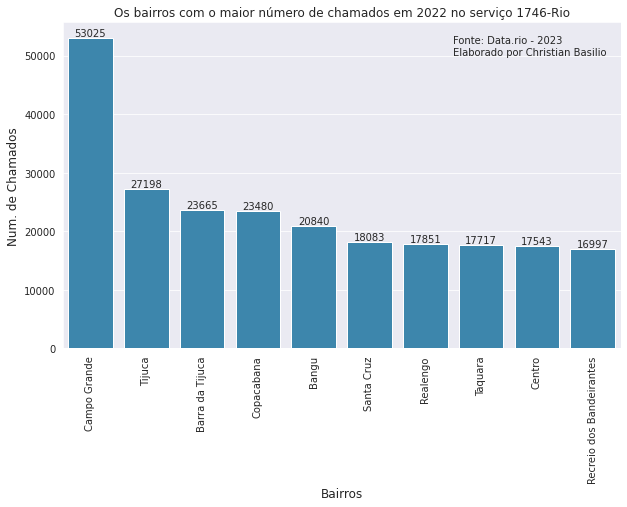

In [ ]:
# Top 10
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
ax = sns.barplot(data=top_10_bairros_ocorrências, x="nome", y="ocorrencias", color = '#2b8cbe')
plt.xticks(rotation=90)
plt.xlabel('Bairros', size = 12)
plt.ylabel('Num. de Chamados', size = 12)
plt.title('Os bairros com o maior número de chamados em 2022 no serviço 1746-Rio')

# Adicionar rótulos em todas as barras
for i, v in enumerate(top_10_bairros_ocorrências['ocorrencias']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.text(0.7, 0.9, 'Fonte: Data.rio - 2023\nElaborado por Christian Basilio', transform=ax.transAxes)


plt.show()

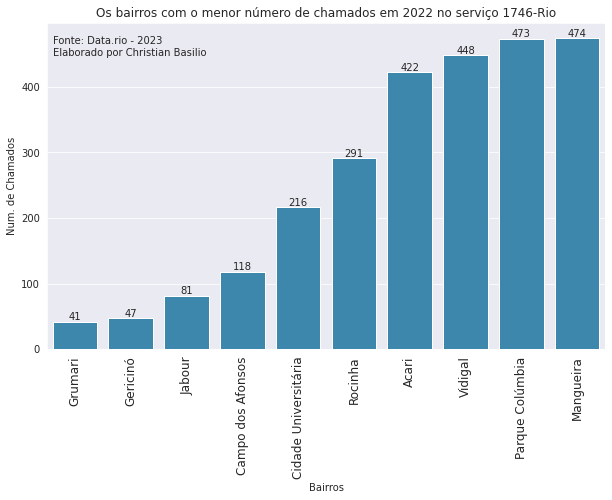

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')

# colocando na ordem reversa
top_10_bairros_ocorrências_menos = top_10_bairros_ocorrências_menos.sort_values(by='ocorrencias')


ax = sns.barplot(data=top_10_bairros_ocorrências_menos, x="nome", y="ocorrencias", color = '#2b8cbe')
plt.xticks(rotation=90)
plt.xlabel('Bairros')
plt.ylabel('Num. de Chamados')
plt.xticks(size = 12)
plt.title('Os bairros com o menor número de chamados em 2022 no serviço 1746-Rio')

# Adicionar rótulos em todas as barras
for i, v in enumerate(top_10_bairros_ocorrências_menos['ocorrencias']):
    ax.text(i, v, str(v), ha='center', va='bottom')

ax.set_xticklabels(top_10_bairros_ocorrências_menos['nome'])

plt.text(0.01, 0.9, 'Fonte: Data.rio - 2023\nElaborado por Christian Basilio', transform=ax.transAxes)


plt.show()

In [ ]:
top_10_bairros_ocorrências_menos[['nome', 'ocorrencias']].sort_values(by = 'ocorrencias', ascending = True)

nome  ocorrencias
163               Grumari           41
162              Gericinó           47
161                Jabour           81
160     Campo dos Afonsos          118
159  Cidade Universitária          216
158               Rocinha          291
157                 Acari          422
156               Vidigal          448
155       Parque Colúmbia          473
154             Mangueira          474

In [ ]:
# Criando porcentagem para total de chamados por bairros
total_chamados = bairros_ocorrencias['ocorrencias'].sum()
bairros_ocorrencias['porcentagem'] = round(bairros_ocorrencias['ocorrencias'] / total_chamados*100,2)
bairros_ocorrencias.head()

id_bairro  ocorrencias             nome nome_regiao_administrativa  \
0       144        53025     Campo Grande               Campo Grande   
1        33        27198           Tijuca                     Tijuca   
2       128        23665  Barra da Tijuca            Barra Da Tijuca   
3        24        23480       Copacabana                 Copacabana   
4       141        20840            Bangu                      Bangu   

     subprefeitura  perc  porcentagem  
0       Zona Oeste  7.08         7.08  
1    Grande Tijuca  3.63         3.63  
2  Barra da Tijuca  3.16         3.16  
3         Zona Sul  3.13         3.13  
4       Zona Oeste  2.78         2.78

In [ ]:
bairros_ocorrencias['ocorrencias'].sum()

749313

* Criando Visualização de porcentagem por subprefeitura

In [ ]:
subpref_porc = bairros_ocorrencias.groupby(['subprefeitura'])['porcentagem'].sum().reset_index().sort_values(by = 'porcentagem', ascending = False)
subpref_porc

subprefeitura  porcentagem
5       Zona Norte        29.46
6       Zona Oeste        23.76
7         Zona Sul        12.72
4      Jacarepaguá         9.91
2    Grande Tijuca         8.03
0  Barra da Tijuca         6.71
1           Centro         6.00
3            Ilhas         3.42

Text(0.7, 0.9, 'Fonte: Data.rio - 2023\nElaborado por Christian Basilio')

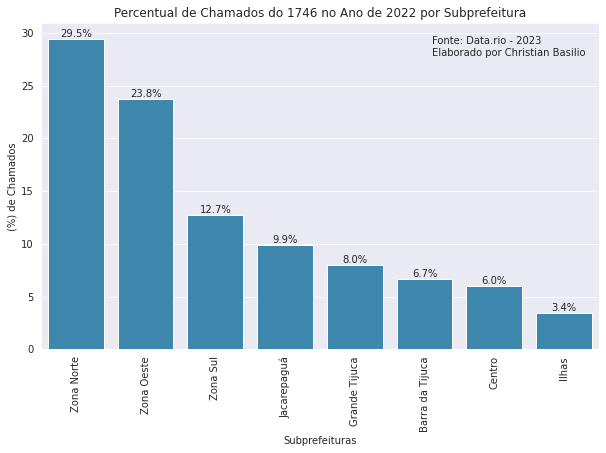

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')

ax = sns.barplot( data=subpref_porc, x="subprefeitura", y="porcentagem",
            color = '#2b8cbe')
plt.xticks(rotation = 90)
plt.xlabel('Subprefeituras')
plt.ylabel('(%) de Chamados')
plt.title('Percentual de Chamados do 1746 no Ano de 2022 por Subprefeitura')

for i, v in enumerate(subpref_porc['porcentagem']):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.text(0.7, 0.9, 'Fonte: Data.rio - 2023\nElaborado por Christian Basilio', transform=ax.transAxes)


As subprefeituras da Znas Norte, Oeste e Sul são as que mais recebem ocorrências no Rio de Janeiro, **sendo a Zona Norte Responsavel por mais de 1/3 das ocorrências no Ano**

* Visualização de Porcentagem por Região Administrativa

In [ ]:
subpref_porc

subprefeitura  porcentagem
5       Zona Norte        29.46
6       Zona Oeste        23.76
7         Zona Sul        12.72
4      Jacarepaguá         9.91
2    Grande Tijuca         8.03
0  Barra da Tijuca         6.71
1           Centro         6.00
3            Ilhas         3.42

In [ ]:
bairros_ocorrencias

id_bairro  ocorrencias                  nome id_regiao_planejamento  \
0         144        53025          Campo Grande                    5.2   
1          33        27198                Tijuca                    2.2   
2         128        23665       Barra da Tijuca                    4.2   
3          24        23480            Copacabana                    2.1   
4         141        20840                 Bangu                    5.1   
..        ...          ...                   ...                    ...   
159       105          216  Cidade Universitária                    3.7   
160       136          118     Campo dos Afonsos                    5.1   
161       163           81                Jabour                    5.1   
162       160           47              Gericinó                    5.1   
163       133           41               Grumari                    4.2   

    nome_regiao_administrativa    subprefeitura  
0                 Campo Grande       Zona Oeste  
1                       Tijuca    Grande Tijuca  
2              Barra Da Tijuca  Barra da Tijuca  
3                   Copacabana         Zona Sul  
4                        Bangu       Zona Oeste  
..                         ...              ...  
159         Ilha Do Governador            Ilhas  
160                   Realengo       Zona Oeste  
161                      Bangu       Zona Oeste  
162                      Bangu       Zona Oeste  
163            Barra Da Tijuca  Barra da Tijuca  

[164 rows x 6 columns]

In [ ]:
bairros_ocorrencias[bairros_ocorrencias['nome_regiao_administrativa'] == 'Jacarepagua']

id_bairro  ocorrencias                     nome id_regiao_planejamento  \
7         122        17717                  Taquara                    4.1   
15        125         9145           Vila Valqueire                    4.1   
16        115         8959              Jacarepaguá                    4.1   
19        120         8505  Freguesia (Jacarepaguá)                    4.1   
27        121         7084                Pechincha                    4.1   
30        124         6797               Praça Seca                    4.1   
46        116         5035                     Anil                    4.1   
53        119         4575                 Curicica                    4.1   
62        123         3865                   Tanque                    4.1   
115       117         1359            Gardênia Azul                    4.1   

    nome_regiao_administrativa subprefeitura  
7                  Jacarepagua   Jacarepaguá  
15                 Jacarepagua   Jacarepaguá  
16                 Jacarepagua   Jacarepaguá  
19                 Jacarepagua   Jacarepaguá  
27                 Jacarepagua   Jacarepaguá  
30                 Jacarepagua   Jacarepaguá  
46                 Jacarepagua   Jacarepaguá  
53                 Jacarepagua   Jacarepaguá  
62                 Jacarepagua   Jacarepaguá  
115                Jacarepagua   Jacarepaguá

In [ ]:
bairros_ocorrencias['porcentagem'] = bairros_ocorrencias['ocorrencias'] / bairros_ocorrencias['ocorrencias'].sum()*100
bairros_ocorrencias

id_bairro  ocorrencias                  nome id_regiao_planejamento  \
0         144        53025          Campo Grande                    5.2   
1          33        27198                Tijuca                    2.2   
2         128        23665       Barra da Tijuca                    4.2   
3          24        23480            Copacabana                    2.1   
4         141        20840                 Bangu                    5.1   
..        ...          ...                   ...                    ...   
159       105          216  Cidade Universitária                    3.7   
160       136          118     Campo dos Afonsos                    5.1   
161       163           81                Jabour                    5.1   
162       160           47              Gericinó                    5.1   
163       133           41               Grumari                    4.2   

    nome_regiao_administrativa    subprefeitura  porcentagem  
0                 Campo Grande       Zona Oeste     7.076482  
1                       Tijuca    Grande Tijuca     3.629725  
2              Barra Da Tijuca  Barra da Tijuca     3.158226  
3                   Copacabana         Zona Sul     3.133537  
4                        Bangu       Zona Oeste     2.781214  
..                         ...              ...          ...  
159         Ilha Do Governador            Ilhas     0.028826  
160                   Realengo       Zona Oeste     0.015748  
161                      Bangu       Zona Oeste     0.010810  
162                      Bangu       Zona Oeste     0.006272  
163            Barra Da Tijuca  Barra da Tijuca     0.005472  

[164 rows x 7 columns]

In [ ]:
regiao_porc = bairros_ocorrencias.groupby(['nome_regiao_administrativa'])['porcentagem'].sum().reset_index().sort_values(by = 'porcentagem', ascending = False)


In [ ]:
# Filtrando as 10 com maiores ocorrências
regiao_porc_top_10= regiao_porc.head(10)
regiao_porc_top_10

nome_regiao_administrativa  porcentagem
14                Jacarepagua     9.747729
4                Campo Grande     9.598526
18                      Meier     8.531415
17                  Madureira     6.727229
2             Barra Da Tijuca     6.702940
3                    Botafogo     5.725778
27                 Santa Cruz     4.270178
1                       Bangu     4.216396
30                     Tijuca     4.064923
32                Vila Isabel     3.960161

Text(0.5, 1.0, 'Percentual de Chamados do 1746 no Ano de 2022 por Subprefeitura')

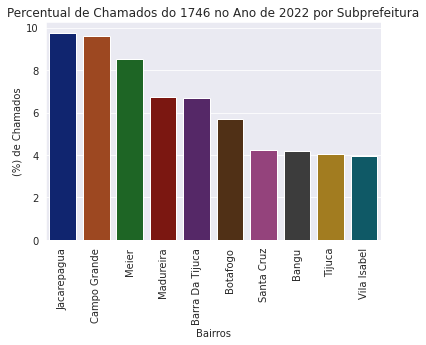

In [ ]:
ax = sns.barplot( data=regiao_porc_top_10, x="nome_regiao_administrativa", y="porcentagem",
            palette = 'dark')
plt.xticks(rotation = 90)
plt.xlabel('Bairros')
plt.ylabel('(%) de Chamados')
plt.title('Percentual de Chamados do 1746 no Ano de 2022 por Subprefeitura')
#plt.suptitle('Produzido por Christian', x = 0.9, y = 0, size = 8)

##### Observando os dados por Organização

In [ ]:
ocorr_organizacao = df['nome_unidade_organizacional'].value_counts().reset_index().rename(columns = {'index':'Organização',
                                                                                 'nome_unidade_organizacional':'Ocorrencias'})
ocorr_organizacao

Organização  Ocorrencias
0      COMLURB - Companhia Municipal de Limpeza Urbana       222007
1          GM-RIO - Guarda Municipal do Rio de Janeiro       158796
2    RIOLUZ - Companhia Municipal de Energia e Ilum...       120483
3              GMA - Gerência de Manutenção Semafórica        21163
4    TR/SUBOP/CFT - Coordenadoria de Fiscalização e...        20608
..                                                 ...          ...
332                                Conselho Tutelar 17            1
333                                              24aGC            1
334  SubMP - Subgerência de Fiscalização e Manutenç...            1
335                                              GEPBG            1
336              DEP - Diretoria de Estudos e Projetos            1

[337 rows x 2 columns]

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)
top_10_organizacao = ocorr_organizacao.head(15)
top_10_organizacao

Organização  Ocorrencias
0                 COMLURB - Companhia Municipal de Limpeza Urbana       222007
1                     GM-RIO - Guarda Municipal do Rio de Janeiro       158796
2            RIOLUZ - Companhia Municipal de Energia e Iluminação       120483
3                         GMA - Gerência de Manutenção Semafórica        21163
4     TR/SUBOP/CFT - Coordenadoria de Fiscalização em Transportes        20608
5         DEFESA CIVIL - Subsecretaria de Proteção e Defesa Civil        15790
6             CLF - Coordenadoria de Licenciamento e Fiscalização        13127
7                                                           21aGC        12266
8                                                          SUBPSE         9176
9                                                           13aGC         7666
10  GFER - Gerência de Fiscalização de Estacionamentos e Reboques         7407
11                                         Central de Ambulâncias         5907
12               Subgerência de Patrulhamento Ambiental - Base II         5458
13  SMPDA - Secretaria Municipal de Proteção e Defesa dos Animais         5390
14                                                          08aGC         5231

KeyError: ignored

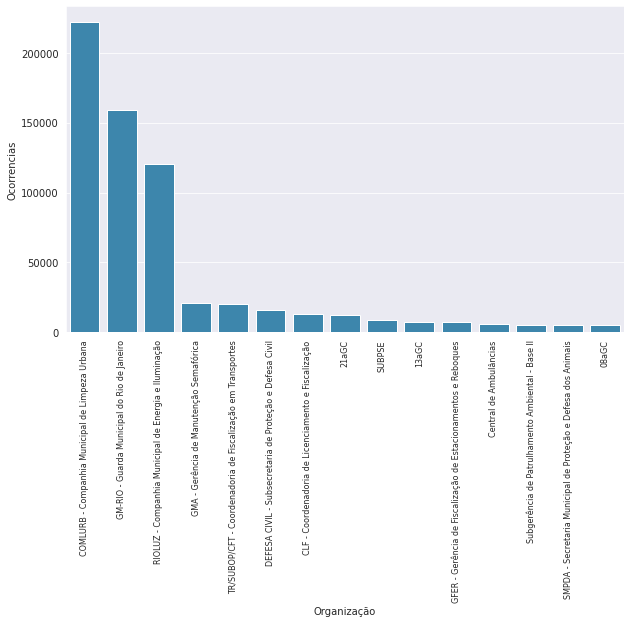

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')

ax = sns.barplot( data=top_10_organizacao, x="Organização", y="Ocorrencias",
            color = '#2b8cbe')
plt.xticks(rotation = 90, size = 8)
for i, v in enumerate(top_10_organizacao['ocorrencias']):
    ax.text(i, v, str(v), ha='center', va='bottom')

In [ ]:
import plotly.express as px

In [ ]:
px.bar(top_10_organizacao, x = 'Organização', y = 'Ocorrencias', title = 'Organizações com maior Numero de Chamados no 1746 em 2022')

* **Comlurb, Guarda Municipal e Rio Luz são as organizações que mais recebem chamados, com um total de 188, 135, 107 mil, respectivalmente.**

###### Olhando para prazos por Bairros

In [ ]:
prazo = df[['id_bairro','dentro_prazo']]

In [ ]:
bairro_prazo = prazo.merge(bairros, on='id_bairro')
bairro_prazo

In [ ]:
agrup_prazo = bairro_prazo.value_counts().reset_index().rename(columns = {0 : 'chamados'}).sort_values(by = 'chamados', ascending = False)
agrup_prazo

In [ ]:
agrup_prazo['porc'] = agrup_prazo['chamados'] / agrup_prazo['chamados'].sum()*100
agrup_prazo.groupby(['dentro_prazo'])['porc'].sum()

*  **66,9%** das Ocorrências abertas em 2022 estão dentro do Prazo

In [ ]:
prazo_subpref = agrup_prazo.groupby(['dentro_prazo','subprefeitura'])['porc'].sum().reset_index()

In [ ]:
px.bar(prazo_subpref, x="subprefeitura", y='porc', color = 'dentro_prazo',title="Percentagem de Chamado dentro do prazo no 1746 em 2022")

In [ ]:
df.columns

### Ocorrêmcias

In [ ]:
bairros_ocorrencias.head()

### Olhando para dados no jacarezinho

In [27]:
df.head()

id_chamado         data_inicio            data_fim id_bairro  \
0   17869191 2022-11-03 10:43:28 2022-11-11 10:29:03       144   
1   17949670 2022-11-25 09:47:16 2022-11-25 13:18:40       144   
2   17890839 2022-11-09 11:40:51 2022-11-09 14:13:29         5   
3   17878720 2022-11-06 12:29:00 2022-11-07 09:03:22        52   
4   17898500 2022-11-10 20:33:21 2022-11-11 14:47:18        75   

  id_territorialidade id_logradouro  numero_logradouro  \
0                   5        260851                  6   
1                   5         35279                  0   
2                   1         62984                  0   
3                   3         63933               2725   
4                   3         10645               1525   

  id_unidade_organizacional          nome_unidade_organizacional  \
0                       186                                21aGC   
1                       597                           Patrimônio   
2                       597                           Patrimônio   
3                       597                           Patrimônio   
4                        71  SMS - Secretaria Municipal de Saúde   

                           id_unidade_organizacional_mae  \
0                                             SECONSERVA   
1  SMFP - Secretaria Municipal de Fazenda e Planejamento   
2  SMFP - Secretaria Municipal de Fazenda e Planejamento   
3  SMFP - Secretaria Municipal de Fazenda e Planejamento   
4                    SMS - Secretaria Municipal de Saúde   

  unidade_organizacional_ouvidoria categoria id_tipo                   tipo  \
0                            False   Serviço       9  Drenagem e Saneamento   
1                            False   Serviço      10      Mobiliário Urbano   
2                            False   Serviço      10      Mobiliário Urbano   
3                            False   Serviço      10      Mobiliário Urbano   
4                            False   Serviço      80                 Dengue   

  id_subtipo                                                         subtipo  \
0        102             Desobstrução de galerias e ramais de águas pluviais   
1        130                                  Instalação de abrigo de ônibus   
2        144   Instalação/ Remoção/ Manutenção de placa de rua tipo pirulito   
3        144   Instalação/ Remoção/ Manutenção de placa de rua tipo pirulito   
4        999  Vistoria em foco de Aedes Aegypti (Dengue, Chikungunya e Zika)   

      status  longitude   latitude data_alvo_finalizacao  \
0  Cancelado        NaN        NaN   2022-11-28 10:19:00   
1  Cancelado -43.536084 -22.878013   2022-12-16 09:47:00   
2  Cancelado -43.180574 -22.903484   2022-12-01 11:40:00   
3  Cancelado -43.284783 -22.887501   2022-11-29 00:00:00   
4  Cancelado -43.318186 -22.827137   2022-11-18 20:33:00   

  data_alvo_diagnostico data_real_diagnostico  tempo_prazo prazo_unidade  \
0                   NaT                   NaT         <NA>             D   
1                   NaT                   NaT         <NA>             D   
2                   NaT                   NaT         <NA>             D   
3                   NaT                   NaT         <NA>             D   
4                   NaT                   NaT         <NA>             D   

  prazo_tipo dentro_prazo   situacao tipo_situacao justificativa_status  \
0          F     No prazo  Encerrado  Não atendido                 None   
1          F     No prazo  Encerrado  Não atendido                 None   
2          F     No prazo  Encerrado  Não atendido                 None   
3          F     No prazo  Encerrado  Não atendido                 None   
4          F     No prazo  Encerrado  Não atendido                 None   

   reclamacoes data_particao                        geometry  
0            0    2022-11-01                            None  
1            0    2022-11-01   POINT(-43.5360839 -22.878013)  
2            0    2022-11-01  POINT(-43.1805742 -22.9034836)  
3        

In [28]:
bairros.head()

id_bairro          nome id_area_planejamento id_regiao_planejamento  \
0         2        Gamboa                    1                    1.1   
1         1         Saúde                    1                    1.1   
2         4          Caju                    1                    1.1   
3         3  Santo Cristo                    1                    1.1   
4       161          Lapa                    1                    1.1   

  nome_regiao_planejamento id_regiao_administrativa  \
0                   Centro                        1   
1                   Centro                        1   
2                   Centro                        1   
3                   Centro                        1   
4                   Centro                        2   

  nome_regiao_administrativa subprefeitura          area     perimetro  \
0                  Portuaria        Centro  1.112903e+06   4612.833630   
1                  Portuaria        Centro  3.638176e+05   2646.220568   
2                  Portuaria        Centro  5.347481e+06  19800.522524   
3                  Portuaria        Centro  1.684721e+06   6743.227885   
4                     Centro        Centro  2.983258e+05   3849.181818   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [30]:
bairros.columns

Index(['id_bairro', 'nome', 'id_area_planejamento', 'id_regiao_planejamento',
       'nome_regiao_planejamento', 'id_regiao_administrativa',
       'nome_regiao_administrativa', 'subprefeitura', 'area', 'perimetro',
       'geometry_wkt', 'geometry'],
      dtype='object')

In [34]:
bairro_id = bairros[['id_bairro', 'nome']]
bairro_id[bairro_id['nome'] == 'Jacarezinho']

id_bairro         nome
62       155  Jacarezinho

In [42]:
# Vendo o id do jacarezinho - 155
df.head(1)

id_chamado         data_inicio            data_fim id_bairro  \
0   17869191 2022-11-03 10:43:28 2022-11-11 10:29:03       144   

  id_territorialidade id_logradouro  numero_logradouro  \
0                   5        260851                  6   

  id_unidade_organizacional nome_unidade_organizacional  \
0                       186                       21aGC   

  id_unidade_organizacional_mae unidade_organizacional_ouvidoria categoria  \
0                    SECONSERVA                            False   Serviço   

  id_tipo                   tipo id_subtipo  \
0       9  Drenagem e Saneamento        102   

                                               subtipo     status  longitude  \
0  Desobstrução de galerias e ramais de águas pluviais  Cancelado        NaN   

   latitude data_alvo_finalizacao data_alvo_diagnostico data_real_diagnostico  \
0       NaN   2022-11-28 10:19:00                   NaT                   NaT   

   tempo_prazo prazo_unidade prazo_tipo dentro_prazo   situacao tipo_situacao  \
0         <NA>             D          F     No prazo  Encerrado  Não atendido   

  justificativa_status  reclamacoes data_particao geometry  
0                 None            0    2022-11-01     None

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773524 entries, 0 to 773523
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   id_chamado                        773524 non-null  object        
 1   data_inicio                       773524 non-null  datetime64[ns]
 2   data_fim                          717967 non-null  datetime64[ns]
 3   id_bairro                         749313 non-null  object        
 4   id_territorialidade               749313 non-null  object        
 5   id_logradouro                     749313 non-null  object        
 6   numero_logradouro                 711798 non-null  Int64         
 7   id_unidade_organizacional         773524 non-null  object        
 8   nome_unidade_organizacional       773524 non-null  object        
 9   id_unidade_organizacional_mae     773524 non-null  object        
 10  unidade_organizacional_ouvidoria

In [43]:
df.shape[0]

773524

In [48]:
jacarezinho = df[df['id_bairro'] == "155"]
jacarezinho.shape[0]

482

In [49]:
jacarezinho.head()

id_chamado         data_inicio            data_fim id_bairro  \
4505    17876757 2022-11-05 10:51:19                 NaT       155   
4506    17876749 2022-11-05 10:49:50                 NaT       155   
4507    17876771 2022-11-05 10:54:50                 NaT       155   
5395    17954154 2022-11-26 12:40:30                 NaT       155   
16186   17904898 2022-11-12 19:44:51 2022-11-18 00:01:00       155   

      id_territorialidade id_logradouro  numero_logradouro  \
4505                    3        487728                  5   
4506                    3        487728                  1   
4507                    3        487728                 85   
5395                    3         86892                171   
16186                   3         82693                 28   

      id_unidade_organizacional  \
4505                        173   
4506                        173   
4507                        173   
5395                        118   
16186                         8   

                                nome_unidade_organizacional  \
4505                                                  08aGC   
4506                                                  08aGC   
4507                                                  08aGC   
5395        COMLURB - Companhia Municipal de Limpeza Urbana   
16186  RIOLUZ - Companhia Municipal de Energia e Iluminação   

                              id_unidade_organizacional_mae  \
4505                                             SECONSERVA   
4506                                             SECONSERVA   
4507                                             SECONSERVA   
5395        COMLURB - Companhia Municipal de Limpeza Urbana   
16186  RIOLUZ - Companhia Municipal de Energia e Iluminação   

      unidade_organizacional_ouvidoria categoria id_tipo                tipo  \
4505                             False   Serviço      22       Vias públicas   
4506                             False   Serviço      22       Vias públicas   
4507                             False   Serviço      22       Vias públicas   
5395                             False   Serviço     280      Manejo Arbóreo   
16186                            False   Serviço       1  Iluminação Pública   

      id_subtipo                                    subtipo  \
4505         114  Fiscalização de obstáculo fixo na calçada   
4506         114  Fiscalização de obstáculo fixo na calçada   
4507         114  Fiscalização de obstáculo fixo na calçada   
5395        1319               Poda de árvore em logradouro   
16186          6                  Reparo de lâmpada apagada   

                    status  longitude  latitude data_alvo_finalizacao  \
4505          Em Andamento        NaN       NaN   2022-11-29 00:00:00   
4506          Em Andamento        NaN       NaN   2022-11-29 00:00:00   
4507          Em Andamento        NaN       NaN   2022-11-29 00:00:00   
5395          Em Andamento -43.256437 -22.89017                   NaT   
16186  Fechado com solução        NaN       NaN   2022-11-16 19:44:00   

      data_alvo_diagnostico data_real_diagnostico  tempo_prazo prazo_unidade  \
4505                    NaT                   NaT         <NA>             D   
4506                    NaT                   NaT         <NA>             D   
4507                    NaT                   NaT         <NA>             D   
5395    2022-12-11 12:40:00   2022-11-28 12:39:41         <NA>             D   
16186                   NaT                   NaT         <NA>             D   

      prazo_tipo   dentro_prazo       situacao tipo_situacao  \
4505           F  Fora do prazo  Não Encerrado     Andamento   
4506           F  Fora do prazo  Não Encerrado     Andamento   
4507           F  Fora do prazo  Não Encerrado     Andamento   
5395           D  Fora do prazo  Não Encerrado     Andamento   
16186          F  Fora do prazo      Encerrado      Atendido   

      justificativa_status  reclamacoes data_particao  \
4505                 

In [75]:
# Feito ou não feito
jacarezinho_status = jacarezinho['status'].value_counts()
jacarezinho_status = jacarezinho_status.reset_index().rename(columns = {'index' : 'Status',
                                                   'status' : 'Total'})

In [76]:
jacarezinho_status

Status  Total
0               Fechado com solução    223
1  Sem possibilidade de atendimento    128
2                      Em Andamento     74
3                            Aberto     28
4                    Não constatado     17
5          Fechado com providências      7
6            Fechado com informação      4
7                         Cancelado      1

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

<Figure size 1200x1000 with 0 Axes>

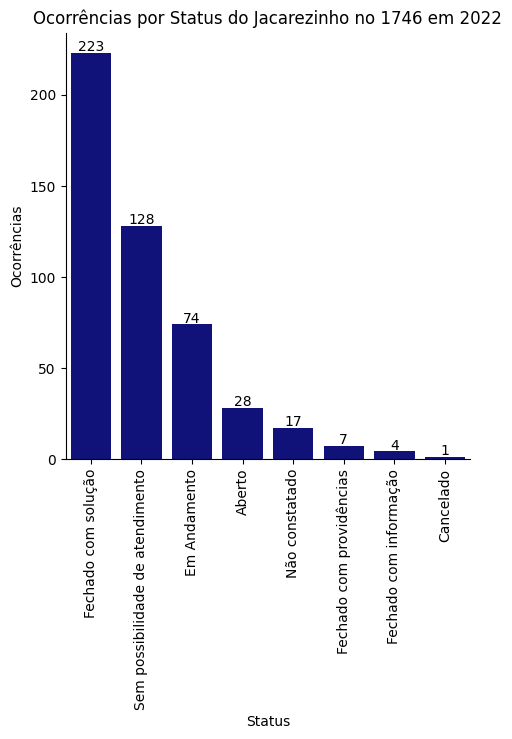

In [80]:
# Grafico

plt.figure(figsize=(12, 10))
ax = sns.catplot(kind = 'bar', data = jacarezinho_status, x = 'Status', y = 'Total', color='darkblue')
ax.set_xticklabels(rotation=90)
ax.set(ylabel='Ocorrências')
ax.set(title='Ocorrências por Status do Jacarezinho no 1746 em 2022')
for i in ax.ax.patches:
    ax.ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 1, str(int(i.get_height())), ha='center', fontsize=10)

plt.show()

In [81]:
df['nome_unidade_organizacional'].value_counts(normalize = True) * 100

COMLURB - Companhia Municipal de Limpeza Urbana                28.700726
GM-RIO - Guarda Municipal do Rio de Janeiro                    20.528904
RIOLUZ - Companhia Municipal de Energia e Iluminação           15.575858
GMA - Gerência de Manutenção Semafórica                         2.735920
TR/SUBOP/CFT - Coordenadoria de Fiscalização em Transportes     2.664171
                                                                 ...    
Conselho Tutelar 19                                             0.000129
Conselho Tutelar 17                                             0.000129
AP 3.2.4                                                        0.000129
CVS - GLF-2                                                     0.000129
DEP - Diretoria de Estudos e Projetos                           0.000129
Name: nome_unidade_organizacional, Length: 337, dtype: float64

In [56]:
nome_unidade_organizacional = jacarezinho['nome_unidade_organizacional'].value_counts(normalize = True) * 100
nome_unidade_organizacional

COMLURB - Companhia Municipal de Limpeza Urbana                                 17.634855
GM-RIO - Guarda Municipal do Rio de Janeiro                                     12.448133
08aGC                                                                           10.580913
RIOLUZ - Companhia Municipal de Energia e Iluminação                            10.580913
COOPE - Coordenadoria de Operações Especiais                                     9.543568
07aGC                                                                            9.543568
DEFESA CIVIL - Subsecretaria de Proteção e Defesa Civil                          7.053942
GMA - Gerência de Manutenção Semafórica                                          3.941909
GLF – Meier                                                                      2.904564
TR/SUBOP/CFT - Coordenadoria de Fiscalização em Transportes                      2.697095
CCU - 3º Serviço de Fiscalização                                                 2.489627
CGLF - Coo